<a href="https://colab.research.google.com/github/xs2445/Algorithms/blob/main/LinkedList.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LinkedList

[707 [M] Design Linked List](#707)

[19 [M] Remove Nth Node From End of List](#19)

[206 [E] Reverse Linked List](#206)

[92 [M] Reverse Linked List II](#92)

[24 [M] Swap Nodes in Pairs](#24)

[25 [H] Reverse Nodes in k-Group](#25)

[141 [E] Linked List Cycle](#141)

[142 [M] Linked List Cycle II](#142)

[160 [E] Intersection of Two Linked Lists](#160)


In [2]:
from typing import List, Optional

class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

<a name="707"></a>

## 707 [M] Design Linked List



In [ ]:
class MyLinkedList:

    def __init__(self):
        self.size = 0
        self.head = ListNode(-1)

    def get(self, index: int) -> int:
        # if index is invalid
        if index < 0 or index >= self.size:
            return -1
        curr = self.head
        for _ in range(index+1):
            curr = curr.next
        return curr.val

    def addAtHead(self, val: int) -> None:
        self.addAtIndex(0, val)

    def addAtTail(self, val: int) -> None:
        self.addAtIndex(self.size, val)

    def addAtIndex(self, index: int, val: int) -> None:
        # if index larger or smaller than the range
        if index > self.size or index < 0:
            return 
        # comfirm node is added
        self.size += 1
        pred = self.head
        # addAtIndex([0,2])
        # -1 -> 1 -> 2
        # -1 -> (2) -> 1 -> 2
        #
        #addAtIndex([3,1])
        # -1 -> 2 -> 1 -> 2
        # -1 -> 2 -> 1 -> 2 -> (1)
        # get the predecessor
        for _ in range(index):
            pred = pred.next
        add_node = ListNode(val, pred.next)
        pred.next = add_node

    def deleteAtIndex(self, index: int) -> None:
        if index < 0 or index >= self.size:
            return
        self.size -= 1
        pred = self.head
        for _ in range(index):
            pred = pred.next
        pred.next = pred.next.next

In [ ]:
["MyLinkedList","addAtHead","addAtTail","addAtIndex","get","deleteAtIndex","get"]
[[],[1],[3],[1,2],[1],[1],[1]]

<a name="19"></a>

## 19 [M] Remove Nth Node From End of List

In [ ]:
# Definition for singly-linked list.
# add dummy node pointing to the head
# slow implementation

class Solution:
    def removeNthFromEnd(self, head: Optional[ListNode], n: int) -> Optional[ListNode]:
        dummy = ListNode(next=head)
        curr = dummy
        # traverse first to get the length
        length = 0
        while curr.next:
            length += 1
            curr = curr.next
        # get the node one step before the node that is going to be deleted
        curr = dummy
        for _ in range(length-n):
            curr = curr.next
        # the node gonna be deleted
        node_delete = curr.next
        if node_delete.next:
            curr.next = node_delete.next
        else:
            curr.next= None

        return dummy.next

        

In [ ]:
# Definition for singly-linked list.
# add dummy node pointing to the head
# add a faster node that is n+1 steps faster than the current node
# faster than 35.8%, still slow

class Solution:
    def removeNthFromEnd(self, head: Optional[ListNode], n: int) -> Optional[ListNode]:
        dummy = ListNode(next=head)
        curr = fast = dummy
        for _ in range(n):
            fast = fast.next
        while fast.next:
            fast = fast.next
            curr = curr.next
        # the node gonna be deleted
        node_delete = curr.next
        if node_delete.next:
            curr.next = node_delete.next
        else:
            curr.next= None
        
        return dummy.next

In [ ]:
# Definition for singly-linked list.
# faster than 79.4% (from leetcode comment)

class Solution:
    def removeNthFromEnd(self, head: Optional[ListNode], n: int) -> Optional[ListNode]:
        curr = head
        length = 0
        while curr:
            length += 1
            curr = curr.next
        if length == 1:
            return None
        if length == n:
            head = head.next
            return head
        curr = head
        for i in range(length-n-1):
            curr = curr.next
        curr.next = curr.next.next
        return head

In [ ]:
nodes = ListNode(1)
n = 1
sol = Solution()
print(sol.removeNthFromEnd(nodes, n))

None


<a name="206"></a>

## 206 [E] Reverse Linked List

In [ ]:
# iteration

class Solution:
    def reverseList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        new_head = None
        ptr = head
        while ptr:
            successor = ptr.next
            ptr.next = new_head
            new_head = ptr
            ptr = successor
        return new_head

In [ ]:
# recurssion

class Solution:
    def reverseList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        # return the last element of the linked list
        if head is None or head.next is None:
            return head
        
        # new_head is the last element of the linked list, which is the head of 
        # reversed linked list 
        # new_head will be passed to the first call of this function
        new_head = self.reverseList(head.next)
        # inverse the arrow between head and head.next
        # from:
        # 2 -> 3 <- 4
        # to:
        # 2 <-> 3 <- 4
        head.next.next = head
        # to:
        # 2 <- 3 <- 4
        head.next = None

        return new_head

In [ ]:
# another recursion
# very fast
class Solution:
    def reverseList(self, head: Optional[ListNode]) -> Optional[ListNode]:

        def _reverse(node, prev=None):
            if not node:
                return prev
            successor = node.next
            node.next = prev

            return _reverse(successor, node)

        return _reverse(head)

<a name="92"></a>

## 92 [M] Reverse Linked List II

In [ ]:
# iterative solution

class Solution:
    def reverseBetween(self, head: Optional[ListNode], left: int, right: int) -> Optional[ListNode]:
        # if empty list then return none
        if head is None:
            return None
        # length of the list
        l = right - left + 1
        dummy = ListNode(-1, head)
        new_head = dummy
        # 0-indexed list
        for _ in range(left-1):
            new_head = new_head.next
        # point to the first element of the list
        pred = new_head
        ptr = new_tail = new_head.next
        while l:
            next_node = ptr.next
            ptr.next = new_head
            new_head = ptr
            ptr = next_node
            l -= 1
        # the sub-linked-list is reversed, the head is tail, tail is head
        # previous tail is the head now, the predecessor needs to link to it.
        pred.next = new_head
        # previous head is the tail now, still linked to the predecessor which can cause a cycle
        new_tail.next = ptr
        
        return dummy.next   
            

In [ ]:
# recursive solution

class Solution:
    def reverseBetween(self, head: Optional[ListNode], left: int, right: int) -> Optional[ListNode]:
        if head is None:
            return None
        node_l, node_r = head, head
        stop = False
        def reverseRecursively(node_r, m, n):
            nonlocal node_l, stop

            # move to the right position
            if n == 1:
                return
            

        

        reverseRecursively(right, m, n)
        return head
        
        
            

<a name="24"></a>

## 24 [M] Swap Nodes in Pairs

In [ ]:
# Definition for singly-linked list.
# iteratively swap
# slow

class Solution:
    def swapPairs(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if head is None or head.next is None:
            return head
        dummy = ListNode(next=head)
        prev = dummy
        curr = head

        while curr and curr.next:
            
            left, right = curr, curr.next
            prev.next = right

            left.next = right.next
            right.next = left

            curr = left.next
            prev = left

        return dummy.next



In [ ]:
# recursion
# faster than iterative implementation

class Solution(object):
    def swapPairs(self, head: ListNode) -> ListNode:
        if head is None or head.next is None:
            return head
        
        left = head
        right = head.next

        left.next = self.swapPairs(right.next)
        right.next = left

        return right
        

<a name="25"></a>

## 25 [H] Reverse Nodes in k-Group

In [ ]:
# 

class Solution:
    def reverseKGroup(self, head: Optional[ListNode], k: int) -> Optional[ListNode]:
        ptr = head
        count = 0

        # iterate for k element
        while count < k and ptr:
            ptr = ptr.next
            count += 1
        
        # if there's at least k elements in the list
        if count == k:
            # reverse this nodelist
            new_head = self.reverseLinkList(head, k)
            # then revursively call function to the rest node list
            # now the head is the tail of reversed linkedlist
            head.next = self.reverseKGroup(ptr,k)
            # then return the new head
            return new_head
        # if not enough k elements in the list, then return the head of this list
        return head
        
    def reverseLinkList(self, head: Optional[ListNode], k: int) -> Optional[ListNode]:
        new_head, ptr = None, head
        while k:
            succ = ptr.next
            ptr.next = new_head
            new_head = ptr
            ptr = succ
            k -= 1
        return new_head
    

<a name="141"></a>

## 141 [E] Linked List Cycle

In [ ]:
# hash table
# remember the node's address

class Solution:
    def hasCycle(self, head: Optional[ListNode]) -> bool:
        node_seen = set()
        while head:
            if head in node_seen:
                return True
            node_seen.add(head)
            head = head.next
        return False

In [ ]:
# Floyd's cycle finding algorithm
# slow fast pointer
# slow pointer moves 1 step a time; fast pointer moves 2 steps a time
# they will definitely eventually meet each other if there is a cycle

class Solution:
    def hasCycle(self, head: Optional[ListNode]) -> bool:
        if head is None:
            return False
        slow = head
        fast = head.next
        # if fast and slow meet each other then return True
        while slow != fast:
            # if fast reach the end, then no cycle, return False
            if fast is None or fast.next is None:
                return False
            slow = slow.next
            fast = fast.next.next

        return True

<a name="142"></a>

## 142 [M] Linked List Cycle II

In [ ]:
# hashtable

class Solution:
    def detectCycle(self, head: Optional[ListNode]) -> Optional[ListNode]:
        seen = set()
        while head:
            if head in seen:
                return head
            seen.add(head)
            head = head.next
        return None

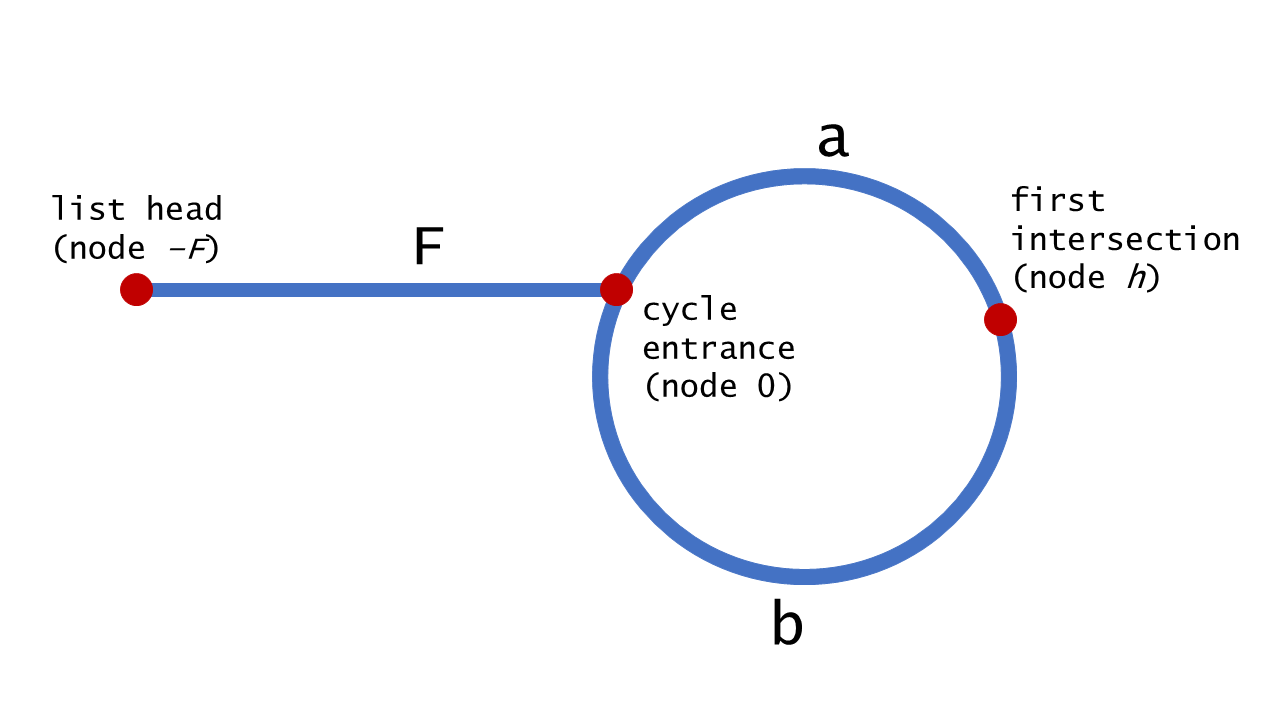

In [ ]:
# Floyd's Tortoise and Hare
# F + a = nC
# F = nC - a
# so: F = b
class Solution:
    def detectCycle(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if head is None or head.next is None:
            return None
        
        # slow and fast needs to start from the same point to make F=b
        slow = fast = head
        
        # find cycle and the meet point
        while True:
            if fast is None or fast.next is None:
                return None
            slow = slow.next
            fast = fast.next.next
            if slow == fast:
                break
            
        ptr_1 = head
        ptr_2 = slow

        while ptr_1 != ptr_2:
            ptr_1 = ptr_1.next
            ptr_2 = ptr_2.next
            
        return ptr_1

<a name="160"></a>

## 160 [E] Intersection of Two Linked Lists


In [ ]:
# hashtable
# add both nodes when proceed
class Solution:
    def getIntersectionNode(self, headA: ListNode, headB: ListNode) -> Optional[ListNode]:
        if headA is None or headB is None:
            return None
        
        seen = set()

        while headA or headB:
            if headA is not None:
                if headA in seen:
                    return headA
                seen.add(headA)
                headA = headA.next
            if headB is not None:
                if headB in seen:
                    return headB
                seen.add(headB)
                headB = headB.next

        return None

In [ ]:
# hashtable 2
# traverse and add one linked list first, then check if the other is in the table
# slower than the first one for test cases
class Solution:
    def getIntersectionNode(self, headA: ListNode, headB: ListNode) -> Optional[ListNode]:
        if headA is None or headB is None:
            return None
        
        setA = set()

        while headA:
            setA.add(headA)
            headA = headA.next

        while headB:
            if headB in setA:
                return headB
            headB = headB.next

        return None

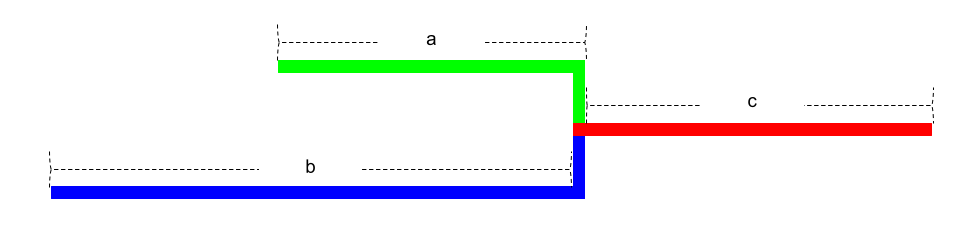

In [ ]:
# two pointers
# traverse both list and change to the other list respectively if reach the en
# then after a+c+b == b+c+a two pointers will definitely meet each other
# at the intersection
# O(1) space needed

# if there's no intersection, then still a+b == b+a
# two pointers will meet at None when traversed both lists

class Solution:
    def getIntersectionNode(self, headA: ListNode, headB: ListNode) -> Optional[ListNode]:
        if headA is None or headB is None:
            return None
        
        pA, pB = headA, headB

        while pA != pB:
            pA = headB if pA is None else pA.next
            pB = headA if pB is None else pB.next
            
        return pA